**Secondary Mushroom Donated on 8/13/2023**

Dataset of simulated mushrooms for binary classification into edible and poisonous.

| Dataset Characteristics | Subject Area    | Associated Tasks |
| ----------------------- | --------------- | ---------------- |
| Tabular                 | Biology         | Classification   |
| **Feature Type**        | **# Instances** | **# Features**   |
| Real                    | 61068           | 20               |

**Dataset Information**

For what purpose was the dataset created?
- Inspired by the Mushroom Data Set of J. Schlimmer: url:https://archive.ics.uci.edu/ml/datasets/Mushroom.

Additional Information

- The given information is about the Secondary Mushroom Dataset, the Primary Mushroom Dataset used for the simulation and the respective metadata can be found in the zip.

- This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
unknown edibility and not recommended (the latter class was combined with the poisonous class).

- The related Python project contains a Python module secondary_data_generation.py
used to generate this data based on primary_data_edited.csv also found in the repository.
Both nominal and metrical variables are a result of randomization.
The simulated and ordered by species version is found in secondary_data_generated.csv.
The randomly shuffled version is found in secondary_data_shuffled.csv.

Has Missing Values?
- No

**Introductory Paper**
- https://www.semanticscholar.org/paper/336be248b6f1c5d77c3c93e89f2e19e7344b0250

**Additional Variable Information**

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

Twenty remaining variables (n: nominal, m: metrical)

1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e, **dry=d**
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r, **none=f**
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

Class Labels (edible=e, poisonous=p)

**Download the Data**

> `Dataset`: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset<br>

Mushroom Data Set 2020 Repository containing the related Python scripts and all the data sets: https://mushroom.mathematik.uni-marburg.de/files/

## Import Libraries & Ingest Data

In [3]:
import numpy as np
np.set_printoptions(precision=4)
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
# from statistics import mode
# from scipy.stats import mode  ## only numeric
# import scipy.stats as stats

import os
import sys
import click
import pickle
# import argparse
# import requests
# import urllib.request
from glob import glob

# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
tqdm._instances.clear()
tqdm.pandas()

import mlflow
import joblib

## memory management performs garbage collection 
import gc; gc.collect()

168

In [4]:
## Create a new directory for storing data
os.makedirs('./data', exist_ok=True)
os.makedirs('./output', exist_ok=True)
os.makedirs('./model', exist_ok=True)
os.makedirs('./pycode', exist_ok=True)
# os.makedirs('tests', exist_ok=True)
# os.makedirs('integration_test', exist_ok=True)
# os.makedirs('utils', exist_ok=True)
## Get the current working directory
# current_dir = os.getcwd()

In [5]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: evidently, mlflow, scikit-plot, yellowbrick


## Ingest Data

In [6]:
!wget -q -N -P "./data" https://archive.ics.uci.edu/static/public/848/secondary+mushroom+dataset.zip

In [7]:
import zipfile
import os
import io

# Define paths
zip_file_path  = 'data/secondary+mushroom+dataset.zip'
inner_zip_path = 'MushroomDataset.zip'
specific_file  = 'MushroomDataset/secondary_data.csv'
extract_path   = 'data/'

## Step 1: Open the outer zip file
# with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_file:
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    ## Step 2: Extract the inner zip file as a ZipExtFile
    with zip_file.open(inner_zip_path) as zip_ext_file:
        ## Step 3: Read the contents of the ZipExtFile into memory a bytes buffer
        zip_ext_file_bytes = io.BytesIO(zip_ext_file.read())
        ## Step 4: Create a ZipFile object from the in-memory contents of the inner zip file
        with zipfile.ZipFile(zip_ext_file_bytes, 'r') as inner_zip_file:
            ## Step 5: Extract the specific file from the inner ZipFile with folder structure
            # inner_zip_file.extract(specific_file, path=extract_path)
            ## Step 5: Extract the specific file without folder structure
            with inner_zip_file.open(specific_file) as f_in:
                ## Define the path to save the extracted file
                with open('data/secondary_data.csv', 'wb') as f_out:
                    f_out.write(f_in.read())
                         
                ## Use io.BytesIO to handle the content in memory a bytes buffer
                # with io.BytesIO(f_in.read()) as f_buffer:
                #     ## Read the content into a pandas DataFrame
                #     df = pd.read_csv(f_buffer, sep=";")
                #     print(df.shape)

In [8]:
glob(f'./data/*.csv')

['./data/secondary_data.csv']

In [9]:
df_raw = pd.read_csv('./data/secondary_data.csv', sep=";")

## Save the data to a parquet file
df_raw.to_parquet('data/secondary_data_2023-08.parquet', index=False)
df_raw = pd.read_parquet('data/secondary_data_2023-08.parquet')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [10]:
df_raw

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,None,w,16.95,...,s,y,w,u,w,t,g,None,d,w
1,p,16.60,x,g,o,f,e,None,w,17.99,...,s,y,w,u,w,t,g,None,d,u
2,p,14.07,x,g,o,f,e,None,w,17.80,...,s,y,w,u,w,t,g,None,d,w
3,p,14.17,f,h,e,f,e,None,w,15.77,...,s,y,w,u,w,t,p,None,d,w
4,p,14.64,x,h,o,f,e,None,w,16.53,...,s,y,w,u,w,t,p,None,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,None,None,y,None,None,f,f,None,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,None,None,y,None,None,f,f,None,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,None,None,y,None,None,f,f,None,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,None,None,y,None,None,f,f,None,d,u


## Exploratory Data Analysis (EDA)

In [11]:
# Mapping dictionary
mapping_dict = {
    "cap-shape": {
        "b": "bell", "c": "conical", "x": "convex", "f": "flat", 
        "s": "sunken", "p": "spherical", "o": "others"
    },
    "cap-surface": {
        "i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth", 
        "h": "shiny", "l": "leathery", "k": "silky", "t": "sticky", 
        "w": "wrinkled", "e": "fleshy", "d": "dry"
    },
    "cap-color": {
        "n": "brown", "b": "buff", "g": "gray", "r": "green", 
        "p": "pink", "u": "purple", "e": "red", "w": "white", 
        "y": "yellow", "l": "blue", "o": "orange", "k": "black"
    },
    "does-bruise-or-bleed": {
        "t": "bruises-or-bleeding", "f": "no"
    },
    "gill-attachment": {
        "a": "adnate", "x": "adnexed", "d": "decurrent", "e": "free", 
        "s": "sinuate", "p": "pores", "f": "none", "?": "unknown"
    },
    "gill-spacing": {
        "c": "close", "d": "distant", "f": "none"
    },
    "gill-color": {
        "n": "brown", "b": "buff", "g": "gray", "r": "green", 
        "p": "pink", "u": "purple", "e": "red", "w": "white", 
        "y": "yellow", "l": "blue", "o": "orange", "k": "black", 
        "f": "none"
    },
    "stem-root": {
        "b": "bulbous", "s": "swollen", "c": "club", "u": "cup", 
        "e": "equal", "z": "rhizomorphs", "r": "rooted", "f": "none"
    },
    "stem-surface": {
        "i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth", 
        "h": "shiny", "l": "leathery", "k": "silky", "t": "sticky", 
        "w": "wrinkled", "e": "fleshy", "d": "dry", "f": "none"
    },
    "stem-color": {
        "n": "brown", "b": "buff", "g": "gray", "r": "green", 
        "p": "pink", "u": "purple", "e": "red", "w": "white", 
        "y": "yellow", "l": "blue", "o": "orange", "k": "black", 
        "f": "none"
    },
    "veil-type": {
        "p": "partial", "u": "universal"
    },
    "veil-color": {
        "n": "brown", "b": "buff", "g": "gray", "r": "green", 
        "p": "pink", "u": "purple", "e": "red", "w": "white", 
        "y": "yellow", "l": "blue", "o": "orange", "k": "black", 
        "f": "none"
    },
    "has-ring": {
        "t": "ring", "f": "none"
    },
    "ring-type": {
        "c": "cobwebby", "e": "evanescent", "r": "flaring", "g": "grooved", 
        "l": "large", "p": "pendant", "s": "sheathing", "z": "zone", 
        "y": "scaly", "m": "movable", "f": "none", "?": "unknown"
    },
    "spore-print-color": {
        "n": "brown", "b": "buff", "g": "gray", "r": "green", 
        "p": "pink", "u": "purple", "e": "red", "w": "white", 
        "y": "yellow", "l": "blue", "o": "orange", "k": "black"
    },
    "habitat": {
        "g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", 
        "h": "heaths", "u": "urban", "w": "waste", "d": "woods"
    },
    "season": {
        "s": "spring", "u": "summer", "a": "autumn", "w": "winter"
    },
    "class": {
        "e": "edible", "p": "poisonous"
    }
}
df = df_raw.copy()
# Apply the mapping using map for each column
for column, mapping in mapping_dict.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

## Replace "none" and "unknown" with NaN using mask, where
# df = df.replace(["none", "unknown"], np.NaN)
# df = df.where(~df.isin(["none", "unknown"]), np.NaN)
df = df.mask(df.isin(["none", "unknown"]), np.NaN)

In [12]:
df.isna().mean()

class                   0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.219653
gill-spacing            0.468208
gill-color              0.057803
stem-height             0.000000
stem-width              0.000000
stem-root               0.861272
stem-surface            0.641618
stem-color              0.017341
veil-type               0.947977
veil-color              0.878613
has-ring                0.751445
ring-type               0.832370
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
dtype: float64

In [13]:
# Identify columns with more than 90% missing values
columns_to_drop = df.isna().mean()[df.isna().mean() > 0.1].index
print('columns_to_drop:', columns_to_drop)
# Drop identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
# Drop rows with any remaining NaN values
df = df.dropna()
df.info()

columns_to_drop: Index(['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root',
       'stem-surface', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 57186 entries, 0 to 59303
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 57186 non-null  object 
 1   cap-diameter          57186 non-null  float64
 2   cap-shape             57186 non-null  object 
 3   cap-color             57186 non-null  object 
 4   does-bruise-or-bleed  57186 non-null  object 
 5   gill-color            57186 non-null  object 
 6   stem-height           57186 non-null  float64
 7   stem-width            57186 non-null  float64
 8   stem-color            57186 non-null  object 
 9   habitat               57186 non-null  object 
 10  season                57186 non-null  object 
dtypes: float64(3), 

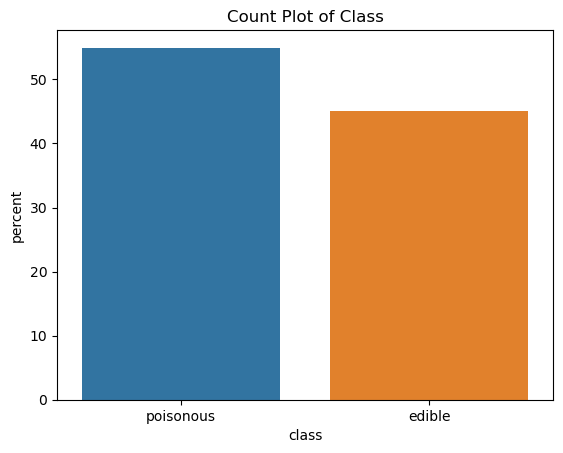

In [14]:
sns.countplot(data=df, x='class', hue='class', stat='percent')
plt.title('Count Plot of Class')
plt.show()

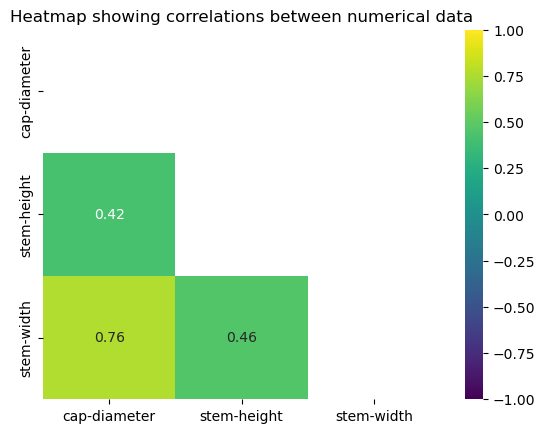

In [15]:
numbers = df.select_dtypes('number').columns

# Feature Importance: Correlation
sns.heatmap(
    df[numbers].corr().round(2), 
    mask=np.triu(np.ones_like(df[numbers].corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap='viridis', fmt='.2f'
)
plt.title('Heatmap showing correlations between numerical data')
plt.show();

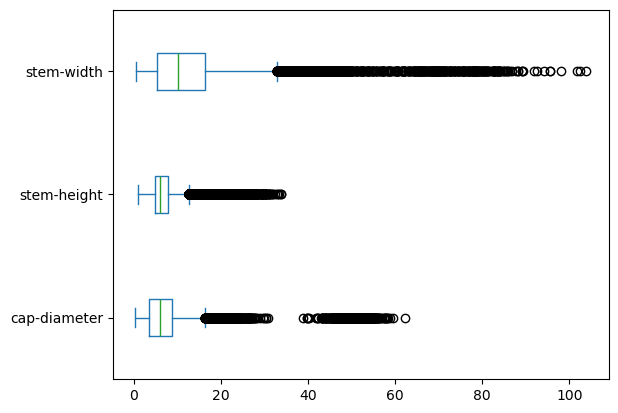

In [16]:
df.select_dtypes('number').plot(kind='box', vert=False);

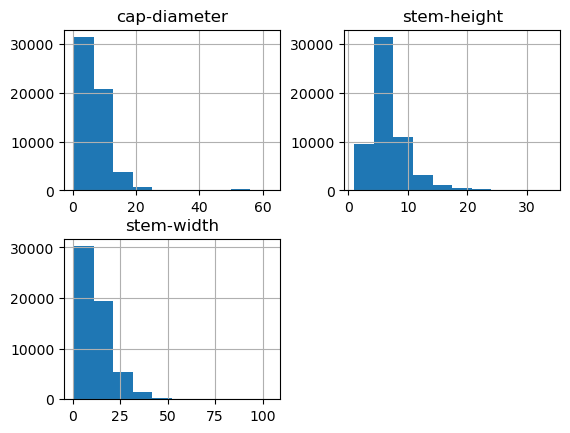

In [17]:
df.select_dtypes('number').hist();

## Split data into training and testing sets

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`class`) is not in your dataframe.

In [18]:
features = df.columns
features

Index(['class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'habitat', 'season'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

## Set the random seed for reproducibility
SEED = 42
np.random.seed(SEED)

## Maps categorical labels to numerical IDs.
label2ids = {'edible': 0, 'poisonous': 1}
## Invert the dictionary to create ids2label
ids2label = {v: k for k, v in label2ids.items()}

## Extract features (X) and target (y)
X = df.drop(columns=['class'])  # Features (exclude the target)
y = df['class'].map(label2ids)  # Target variable

# Split the data into train, validation, and test sets (60%/20%/20%)
full_train_df, test_df, y_full_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)
train_df, val_df, y_train, y_val = train_test_split(full_train_df, y_full_train, stratify=y_full_train, test_size=0.25, random_state=SEED)

# Display the shapes of the resulting sets
print("Train set shape:", train_df.shape, y_train.shape)
print("Val set shape  :", val_df.shape, y_val.shape)
print("Test set shape :", test_df.shape, y_test.shape)

assert len(X) == (len(train_df) + len(val_df) + len(test_df))
assert 'class' not in train_df.columns
assert 'class' not in val_df.columns
assert 'class' not in test_df.columns

Train set shape: (34311, 10) (34311,)
Val set shape  : (11437, 10) (11437,)
Test set shape : (11438, 10) (11438,)


In [20]:
# Feature Importance: Mutual Information
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score

def mutual_information_score(predictor: pd.Series, y=y_train):
    return adjusted_mutual_info_score(predictor, y).round(4)

# Select categorical columns
# cat = train_df.select_dtypes('O').columns
num = train_df.select_dtypes('number').columns

# Discretize continuous features
discretizer = KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='uniform')
train_df1 = train_df.copy()
train_df1[num] = discretizer.fit_transform(train_df[num])

# Calculate mutual information scores
train_df1.apply(mutual_information_score).to_frame(name='MI Scores').sort_values(by='MI Scores', ascending=False)

,MI Scores
stem-color,0.0345
cap-color,0.0250
stem-width,0.0228
habitat,0.0193
gill-color,0.0164
cap-shape,0.0144
stem-height,0.0143
cap-diameter,0.0142
season,0.0086
does-bruise-or-bleed,0.0002


## Model Training

* Now let's train a `logistic regression`.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.pipeline import Pipeline


def model_builder(train_df):    
    # Select categorical columns
    cat = train_df.select_dtypes('O').columns

    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat),
        remainder = 'passthrough',
        force_int_remainder_cols=False,
    )

    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('classifier', RidgeClassifier(max_iter=int(1e5), random_state=SEED))
    ])
    return model

# Create a model
model = model_builder(train_df)

# Fit the model on the training dataset
model.fit(train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color',
       'stem-color', 'habitat', 'season'],
      dtype='object'))])),
                ('scaler', StandardScaler()),
                ('classifier',
                 RidgeClassifier(max_iter=100000, random_state=42))])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on training and validation data
y_val_pred = model.predict(val_df)
y_train_pred = model.predict(train_df)

# Confusion matrix for validation data
print("\nValidation Data:")
print(confusion_matrix(y_val, y_val_pred))
# Classification report for validation data
print(classification_report(y_val, y_val_pred))

# Confusion matrix for training data
print("Training Data:")
print(confusion_matrix(y_train, y_train_pred))
# Classification report for training data
print(classification_report(y_train, y_train_pred))


Validation Data:
[[3442 1712]
 [1530 4753]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      5154
           1       0.74      0.76      0.75      6283

    accuracy                           0.72     11437
   macro avg       0.71      0.71      0.71     11437
weighted avg       0.72      0.72      0.72     11437

Training Data:
[[10367  5094]
 [ 4383 14467]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69     15461
           1       0.74      0.77      0.75     18850

    accuracy                           0.72     34311
   macro avg       0.72      0.72      0.72     34311
weighted avg       0.72      0.72      0.72     34311



## Tree-Based Classifiers

> https://machinelearningmastery.com/xgboost-for-imbalanced-classification/<br>
> https://machinelearningmastery.com/configure-gradient-boosting-algorithm/

In [23]:
!pip show xgboost

Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /opt/conda/lib/python3.11/site-packages
Requires: numpy, scipy
Required-by: 


In [24]:
import xgboost as xgb
from xgboost import XGBClassifier

def model_builder(train_df, params={}):    
    # Select categorical columns
    cat = train_df.select_dtypes('O').columns

    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = make_column_transformer(
        (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat),
        remainder = 'passthrough',
        force_int_remainder_cols=False,
    )

    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state= 42, seed= 42).set_params(**params))
    ])
    return model

In [25]:
# Create a model
model = model_builder(train_df)

# Fit the model on the training dataset
model.fit(train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color',
       'stem-color', 'habitat', 'season'],
      dtype='object'))])),
                ('scaler', StandardScaler(...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on training and validation data
y_val_pred = model.predict(val_df)
y_train_pred = model.predict(train_df)

# Confusion matrix for validation data
print("\nValidation Data:")
print(confusion_matrix(y_val, y_val_pred))
# Classification report for validation data
print(classification_report(y_val, y_val_pred))

# Confusion matrix for training data
print("Training Data:")
print(confusion_matrix(y_train, y_train_pred))
# Classification report for training data
print(classification_report(y_train, y_train_pred))


Validation Data:
[[5091   63]
 [  53 6230]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5154
           1       0.99      0.99      0.99      6283

    accuracy                           0.99     11437
   macro avg       0.99      0.99      0.99     11437
weighted avg       0.99      0.99      0.99     11437

Training Data:
[[15369    92]
 [   96 18754]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15461
           1       1.00      0.99      1.00     18850

    accuracy                           0.99     34311
   macro avg       0.99      0.99      0.99     34311
weighted avg       0.99      0.99      0.99     34311



In [27]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

# Calculate accuracy on the validation dataset
score_raw = roc_auc_score(y_val, model.predict_proba(val_df)[:, 1])  # Probability of positive class

# Initialize a DataFrame to store the differences
scores_df = pd.DataFrame()
features  = train_df.columns

# Loop through each feature and exclude it
for feature in features:
    # Drop one of feature
    subset = features.drop(feature)

    # Initialize a model
    model = model_builder(train_df[subset])    
    # Train a model without the current feature
    model.fit(train_df[subset], y_train) 
    
    # Calculate roc_auc_score
    score_subset = roc_auc_score(y_val, model.predict_proba(val_df)[:, 1])  # Probability of positive class
    
    # Calculate the difference in accuracy, Store the difference in the dictionary
    diff_dict = {
        'eliminated_feature': feature,
        'score_subset': score_subset,
        'difference': (score_subset - score_raw),
    }
    scores_df = scores_df._append(diff_dict, ignore_index=True)

# Find the feature with the smallest difference
scores_df.sort_values(by='difference')

,eliminated_feature,score_subset,difference
4,gill-color,0.997418,-0.001804
6,stem-width,0.997501,-0.001720
7,stem-color,0.997534,-0.001687
2,cap-color,0.997547,-0.001675
3,does-bruise-or-bleed,0.998056,-0.001166
1,cap-shape,0.998155,-0.001066
5,stem-height,0.998491,-0.000730
8,habitat,0.998696,-0.000525
0,cap-diameter,0.998827,-0.000394
9,season,0.998896,-0.000326


## Hyperparameter Optimization

In [28]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe, space_eval
from hyperopt.pyll import stochastic, scope

In [29]:
## min_child_weight
1 / np.sqrt(np.sum(y_train) / len(y_train))

1.3491524011732374

In [30]:
## scale_pos_weight
np.sum(y_train == 0) / np.sum(y_train)

0.820212201591512

In [31]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

## Define params
search_space = {
    'n_estimators'    : scope.int(hp.quniform('n_estimators', 90, 120, 1)),
    'max_depth'       : scope.int(hp.quniform('max_depth', 1, 4, 1)),
    'learning_rate'   : hp.quniform('learning_rate', 1e-2, 0.4, 1e-2),
    'subsample'       : hp.quniform('subsample', 0.6, 0.8, 1e-2),
    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1e-2),
    'scale_pos_weight': hp.quniform('scale_pos_weight', 0.5, 1, 1e-2),
}
def objective(params):        
    ## Train a model
    model = model_builder(train_df, params).fit(train_df, y_train)

    ## Predict probabilities on validation data
    y_val_prob = model.predict_proba(val_df)[:, 1]  # Probability of positive class
    
    # Calculate AUC score, log loss
    score = -roc_auc_score(y_val, y_val_prob)    
    return {'loss': score, 'status': STATUS_OK}

best_params = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials(),
    rstate=np.random.default_rng(42)  # for reproducible results
)
## Print the best hyperparameters
print(f"Best Parameters : {best_params}")

100% 50/50 [00:34<00:00,  1.44trial/s, best loss: -0.9968732573579216]
Best Parameters : {'learning_rate': 0.4, 'max_depth': 4.0, 'min_child_weight': 1.55, 'n_estimators': 111.0, 'scale_pos_weight': 0.6900000000000001, 'subsample': 0.72}


In [32]:
def convert_to_integer_if_whole(params: dict):
    """
    Converts numeric values in a dictionary to integers if they are whole numbers.

    Parameters:
    params_dict (dict): Dictionary containing hyperparameters or numeric values.

    Returns:
    dict: Dictionary with numeric values converted to integers where applicable.
    """
    def convert_to_float(value):
        ## Check if value is a float number
        try:     return float(value)
        except : return value
        
    def convert_to_int(value):
        ## Check if value is a whole number
        return int(value) if pd.api.types.is_number(value) and (value % 1 == 0) else value
        
    for key, value in params.items():
        value = convert_to_float(value)
        value = convert_to_int(value)        
        params[key] = value
    return params

best_params = convert_to_integer_if_whole(best_params)
best_params

{'learning_rate': 0.4,
 'max_depth': 4,
 'min_child_weight': 1.55,
 'n_estimators': 111,
 'scale_pos_weight': 0.6900000000000001,
 'subsample': 0.72}

In [33]:
## Train model with the best hyperparameters
model = model_builder(train_df, best_params).fit(train_df, y_train)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on training and validation data
y_val_pred = model.predict(val_df)
y_val_pred = model.predict(val_df)
y_test_pred = model.predict(test_df)

# Confusion matrix for validation data
print("\nValidation Data:")
print(confusion_matrix(y_val, y_val_pred))
# Classification report for validation data
print(classification_report(y_val, y_val_pred))

# Confusion matrix for training data
print("Training Data:")
print(confusion_matrix(y_train, y_train_pred))
# Classification report for training data
print(classification_report(y_train, y_train_pred))

# Confusion matrix for training data
print("Test Data:")
print(confusion_matrix(y_test, y_test_pred))
# Classification report for training data
print(classification_report(y_test, y_test_pred))


Validation Data:
[[5062   92]
 [ 217 6066]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5154
           1       0.99      0.97      0.98      6283

    accuracy                           0.97     11437
   macro avg       0.97      0.97      0.97     11437
weighted avg       0.97      0.97      0.97     11437

Training Data:
[[15369    92]
 [   96 18754]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15461
           1       1.00      0.99      1.00     18850

    accuracy                           0.99     34311
   macro avg       0.99      0.99      0.99     34311
weighted avg       0.99      0.99      0.99     34311

Test Data:
[[5058   96]
 [ 208 6076]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5154
           1       0.98      0.97      0.98      6284

    accuracy                           0.97     11438

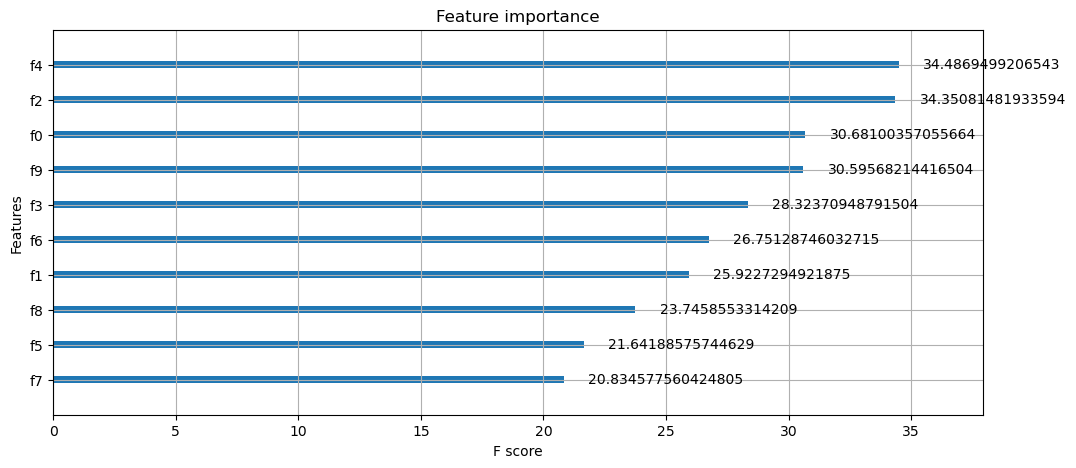

In [35]:
## Native XGBoost feature importances
fig, ax = plt.subplots(figsize=(12, 5))
xgb.plot_importance(model[-1], importance_type='gain', ax=ax)
plt.show()

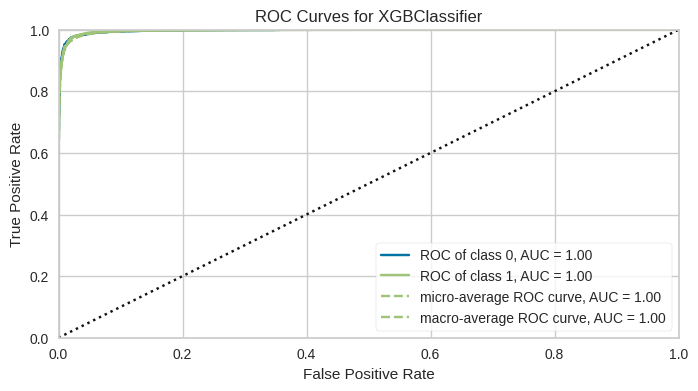

In [36]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

# Instaniate the classification model and visualizer
viz = ROCAUC(model, size=(800, 400))

viz.fit(train_df, y_train)  # Fit the training data to the visualizer
viz.score(val_df, y_val)    # Evaluate the model on the test data
viz.show();                 # Finalize and show the figure

## Save Model

In [37]:
## Save the xgb model to a file.
# model.save_model("model/model.json")

# Save the pipeline to a file
joblib.dump(model, "model/model.joblib")

['model/model.joblib']

In [38]:
## Load the xgb model to a file.
# model = model_builder(train_df)
# model.load_model("model/model.json")

# Load the pipeline from the file
loaded_pipeline = joblib.load("model/model.joblib")

np.array_equal(model.predict(val_df), loaded_pipeline.predict(val_df))

True

# End of The Project